# Reanalysis 2020

In [1]:
PATH_BIGDATA='/home/ryan/subspace/DH/data/antimetrical/big-data-with-added-columns-by-aa-oct-21-2020.csv'
PATH_SMALLDATA1='/home/ryan/subspace/DH/data/antimetrical/small-data-obo-with-added-columns-by-aa-oct-21-2020.csv'
PATH_SMALLDATA2='/home/ryan/subspace/DH/data/antimetrical/small-data-opv-with-added-columns-by-aa-oct-21-2020.csv'
PATH_SMALLDATA3='/home/ryan/subspace/DH/data/antimetrical/small-data-ors-with-added-columns-by-aa-oct-21-2020.csv'

In [2]:
import pandas as pd
import plotnine as p9
import warnings
#from tqdm import tqdm
import tqdm.notebook as tqdm
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv(PATH_BIGDATA)

In [ ]:
# df.iloc[0]

In [6]:
def get_dfbyyear(df,rolling_n=3):
    df_byyear=df.groupby(['metagenre','year']).mean().sort_index()
    if rolling_n:
        df_byyear=pd.concat(g.rolling(3).mean() for i,g in df_byyear.groupby('metagenre')).reset_index()
    return df_byyear

In [7]:
df_byyear=get_dfbyyear(df)

In [8]:
def plot_byyear(df_byyear,title='Metrical tension by genre',y='tension',span=.5):
    return p9.ggplot(
        p9.aes(x='year',y=y, color='metagenre'), data=df_byyear
    ) + p9.geom_point() + p9.geom_smooth(span=span) + p9.theme_classic(
    ) + p9.scale_color_brewer(type='qual', palette=6
    ) + p9.labs(title=title)

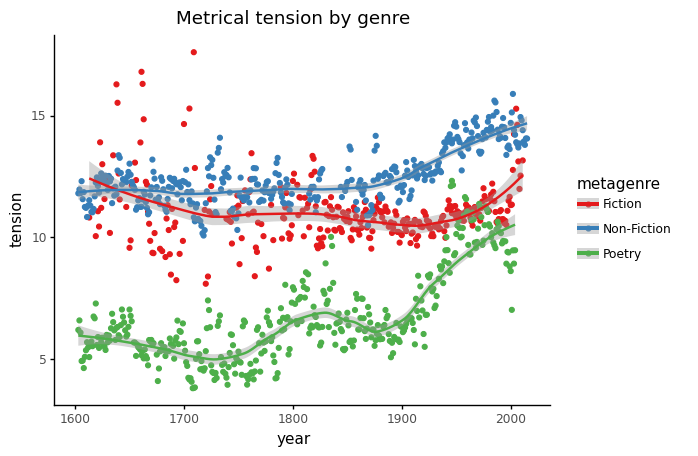

<ggplot: (8738799280165)>

In [9]:
plot_byyear(df_byyear)

## Monosyllable question

In [10]:
# def to_syllcode(parsestr,sep='|',sep2='.'):
    #return sep.join(str(len(x.split(sep2))) for x in parsestr.split(sep))
#     return str(10 - parsestr.count(sep2))

In [11]:
df['syllcode']=df.num_monosylls.apply(int)

In [12]:
topcodes=df.syllcode.value_counts()

In [13]:
from scipy.stats import zscore

In [14]:
# dff.tension

In [15]:
figdf_tension=pd.DataFrame()
for code in topcodes.index[:100]:
    dff=df[df.syllcode==code]
    dff=dff[~dff.tension.isna()]
    s=dff.tension.apply(float)
    dff['tension_z']=(s - s.mean()) / s.std()
    dff['year2']=dff.year.apply(lambda y:y//5*5)
    dffbyyr=get_dfbyyear(dff,rolling_n=1)
    figdf_tension=figdf_tension.append(dffbyyr.assign(code=code))

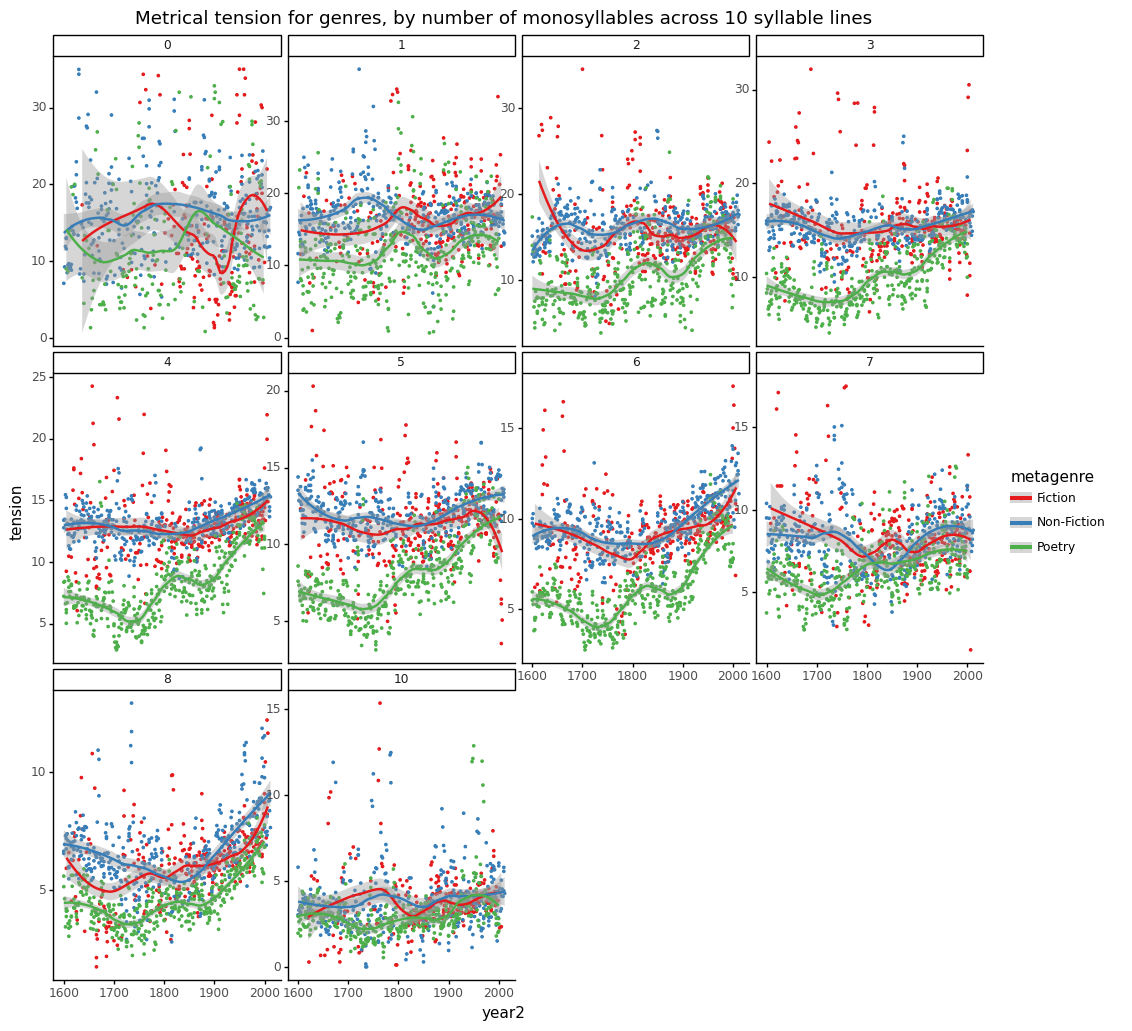

<ggplot: (8738905072056)>

In [16]:
p9.options.figure_size=(12,12)
fig=p9.ggplot(p9.aes(x='year2',y='tension', color='metagenre'), data=figdf_tension.query('-1<tension_z<1'))
fig+=p9.geom_point(size=.5)
fig+=p9.geom_smooth(span=.5)
fig+=p9.theme_classic()
fig+=p9.scale_color_brewer(type='qual', palette=6)
fig+=p9.facet_wrap('code',scales='free_y')
fig+=p9.labs(title='Metrical tension for genres, by number of monosyllables across 10 syllable lines')
# fig+=p9.ylim(-1,1)
fig

## Classifying

In [17]:
gby=['metagenre','year','id']
feats=[
    c for c in df.columns
    if c.startswith('mviol')
    or c.startswith('viol')
    or c in {'tension','perfect_line'}
]

dffeats=df.query('num_monosylls==8')[gby + feats].groupby(gby).mean().sort_index().reset_index()
dffeats['period']=dffeats.year // 50 * 50
dffeats=dffeats.set_index(['year','id'])
dffeats

metagenre  \
year id                                                 
1604 Early_English_Prose_Fiction/ee53010.01   Fiction   
1609 Early_English_Prose_Fiction/ee48010.01   Fiction   
1613 Early_English_Prose_Fiction/ee67011.01   Fiction   
     Early_English_Prose_Fiction/ee67011.02   Fiction   
1619 Early_English_Prose_Fiction/ee87010.01   Fiction   
...                                               ...   
2004 c20-american/am20054/Z300213198           Poetry   
     c20-american/am20054/Z300213202           Poetry   
     c20-american/am20054/Z300213204           Poetry   
     c20-american/am20054/Z300213208           Poetry   
     c20-american/am20054/Z300213211           Poetry   

                                             mviol_footmin.f.resolution_allparse_sum  \
year id                                                                                
1604 Early_English_Prose_Fiction/ee53010.01                                 0.666667   
1609 Early_English_Prose_Fiction/ee48010.01                                 2.000000   
1613 Early_English_Prose_Fiction/ee67011.01                                 1.666667   
     Early_English_Prose_Fiction/ee67011.02                                 0.500000   
1619 Early_English_Prose_Fiction/ee87010.01                                 0.500000   
...                                                                              ...   
2004 c20-american/am20054/Z300213198                                        6.666667   
     c20-american/am20054/Z300213202                                        1.500000   
     c20-american/am20054/Z300213204                                        0.000000   
     c20-american/am20054/Z300213208                                        0.285714   
     c20-american/am20054/Z300213211                                        0.400000   

                                             mviol_footmin.f.resolution_bestparse  \
year id                                                                             
1604 Early_English_Prose_Fiction/ee53010.01                              0.333333   
1609 Early_English_Prose_Fiction/ee48010.01                              0.800000   
1613 Early_English_Prose_Fiction/ee67011.01                              0.333333   
     Early_English_Prose_Fiction/ee67011.02                              0.500000   
1619 Early_English_Prose_Fiction/ee87010.01                              0.166667   
...                                                                           ...   
2004 c20-american/am20054/Z300213198                                     1.000000   
     c20-american/am20054/Z300213202                                     0.000000   
     c20-american/am20054/Z300213204                                     0.000000   
     c20-american/am20054/Z300213208                                     0.000000   
     c20-american/am20054/Z300213211                                     0.200000   

                                             mviol_footmin.w.resolution_allparse_sum  \
year id                                                                                
1604 Early_English_Prose_Fiction/ee53010.01                                 0.000000   
1609 Early_English_Prose_Fiction/ee48010.01                                 1.000000   
1613 Early_English_Prose_Fiction/ee67011.01                                 0.000000   
     Early_English_Prose_Fiction/ee67011.02                                 0.000000   
1619 Early_English_Prose_Fiction/ee87010.01                                 0.000000   
...                                                                              ...   
2004 c20-american/am20054/Z300213198                                        0.000000   
     c20-american/am20054/Z300213202                                        0.000000   
     c20-american/am20054/Z300213204                                        0.000000   
     c20-american/am20054/Z300213208                                        0.28571

In [18]:
from lltk.model.classifier import *

In [19]:
clf=Classifier(dffeats)

In [20]:
clf.classify('metagenre')
clf.report()

## Report for Model (Classifier)
              precision    recall  f1-score   support

     Fiction       0.47      0.48      0.47      3560
 Non-Fiction       0.48      0.43      0.46      3560
      Poetry       0.51      0.55      0.53      3560

    accuracy                           0.49     10680
   macro avg       0.49      0.49      0.48     10680
weighted avg       0.49      0.49      0.48     10680



In [21]:
all_dfr=pd.DataFrame()
all_dfc=pd.DataFrame()
num_runs=10
mincountreq=100
for n in tqdm(range(10),total=10,position=0,desc='Estimating all classifications over runs'):
    dffeats=df.query(f'num_monosylls=={n}')[gby + feats].groupby(gby).mean().sort_index().reset_index()
    dffeats['period']=dffeats.year // 50 * 50
    dffeats=dffeats.set_index(['year','id'])
    for period,pdf in tqdm(dffeats.groupby('period'),position=0,disable=True):
        for metagenre1,mdf1 in pdf.groupby('metagenre'):
            for metagenre2,mdf2 in pdf.groupby('metagenre'):
                if metagenre1>=metagenre2: continue
                mincount=min([len(mdf1),len(mdf2)])
                if mincount<mincountreq: continue
                    
                for nx in range(num_runs):
                    mdf=mdf1.sample(n=mincountreq).append(mdf2.sample(n=mincountreq))
                    clf=Classifier(mdf)
                    clf.classify('metagenre')
                    metagenre=f'{metagenre1} vs. {metagenre2}'
                #     clf.report()
                    all_dfr=all_dfr.append(clf.dfr.assign(metagenre=metagenre,period=period,num_monosylls=n))
                    all_dfc=all_dfc.append(clf.dfc.assign(metagenre=metagenre,period=period,num_monosylls=n))

Estimating all classifications over runs: 100%|██████████| 10/10 [02:22<00:00, 14.25s/it]


In [22]:
figdf=all_dfr.groupby(['true','metagenre','year','period','num_monosylls']).mean().reset_index()

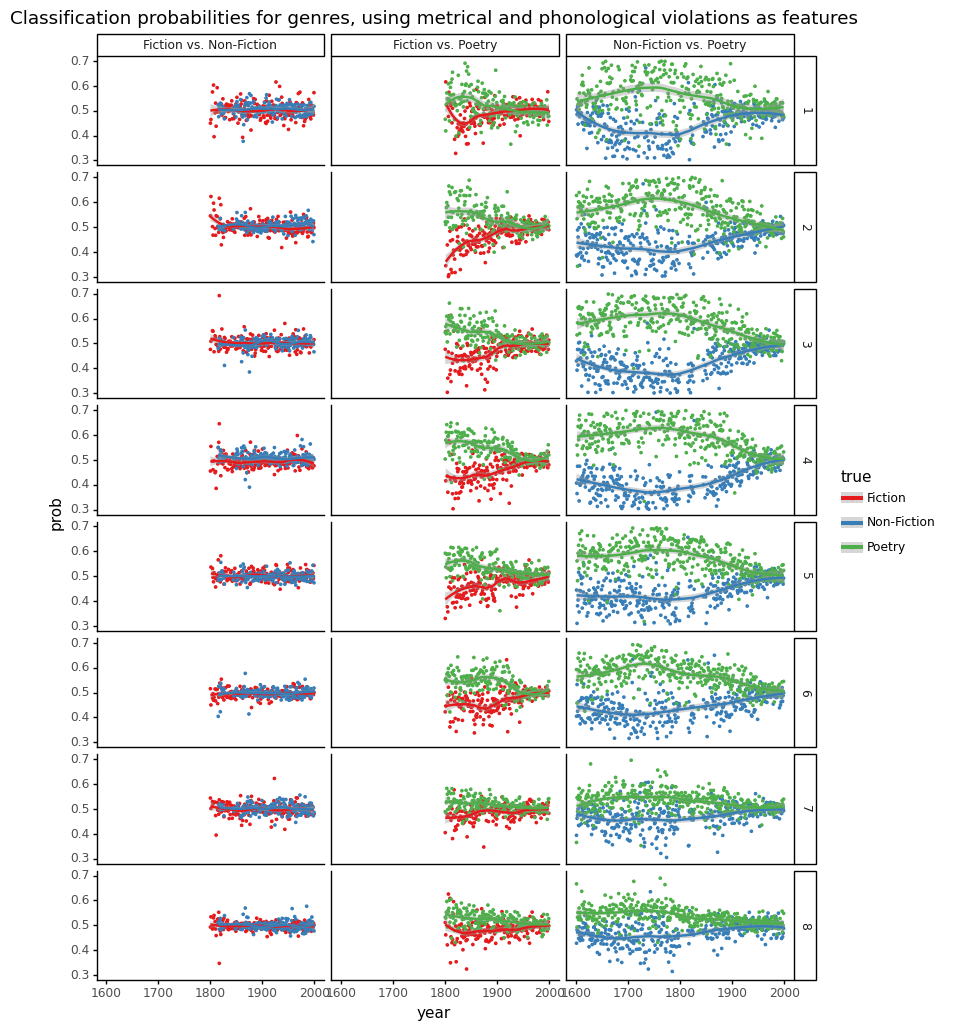

<ggplot: (8738798215349)>

In [23]:
p9.options.figure_size=(9,12)
fig=p9.ggplot(p9.aes(x='year',y='prob', color='true'), data=figdf)
fig+=p9.geom_point(size=.5)
fig+=p9.geom_smooth(span=.5)
fig+=p9.theme_classic()
fig+=p9.scale_color_brewer(type='qual', palette=6)
# fig+=p9.facet_wrap('metagenre')
fig+=p9.facet_grid('num_monosylls~metagenre')
fig+=p9.labs(title='Classification probabilities for genres, using metrical and phonological violations as features')
fig+=p9.ylim(.3,.7)
fig

In [24]:
topfeats=all_dfc.groupby('feat').mean().sort_values('coeff')
topfeats['coeff_abs']=topfeats.coeff.apply(abs)
topfeats['coeff_rank']=topfeats['coeff_abs'].rank(ascending=False)
topfeats_l=topfeats.head(2).index.append(topfeats.tail(2).index)
topfeats.sort_values('coeff_rank')

,coeff,period,num_monosylls,coeff_abs,coeff_rank
feat,,,,,
viol_clash_within_primary,-0.072913,1825.0,4.5,0.072913,1.0
viol_lapse,-0.066601,1825.0,4.5,0.066601,2.0
mviol_strength_w_is_p_bestparse,-0.057992,1825.0,4.5,0.057992,3.0
mviol_stress_s_is_u_bestparse,0.039881,1825.0,4.5,0.039881,4.0
viol_High_Strong,-0.026082,1825.0,4.5,0.026082,5.0
viol_lapse_within,-0.019515,1825.0,4.5,0.019515,6.0
viol_WSP,0.017094,1825.0,4.5,0.017094,7.0
viol_clash,0.016430,1825.0,4.5,0.016430,8.0
viol_clash_across,0.015269,1825.0,4.5,0.015269,9.0


In [25]:
figdf_dfc=all_dfc.groupby(['feat','period','metagenre','num_monosylls']).mean().reset_index()
figdf_dfc=figdf_dfc[figdf_dfc.feat.isin(set(topfeats_l))]
figdf_dfc

,feat,period,metagenre,num_monosylls,coeff
1024,mviol_stress_s_is_u_bestparse,1600,Non-Fiction vs. Poetry,1,0.021414
1025,mviol_stress_s_is_u_bestparse,1600,Non-Fiction vs. Poetry,2,0.004606
1026,mviol_stress_s_is_u_bestparse,1600,Non-Fiction vs. Poetry,3,0.074330
1027,mviol_stress_s_is_u_bestparse,1600,Non-Fiction vs. Poetry,4,0.040752
1028,mviol_stress_s_is_u_bestparse,1600,Non-Fiction vs. Poetry,5,0.008266
...,...,...,...,...,...
3195,viol_lapse,1950,Non-Fiction vs. Poetry,4,-0.018259
3196,viol_lapse,1950,Non-Fiction vs. Poetry,5,-0.039275
3197,viol_lapse,1950,Non-Fiction vs. Poetry,6,-0.004361
3198,viol_lapse,1950,Non-Fiction vs. Poetry,7,-0.039073


In [26]:
figdf_dfc

,feat,period,metagenre,num_monosylls,coeff
1024,mviol_stress_s_is_u_bestparse,1600,Non-Fiction vs. Poetry,1,0.021414
1025,mviol_stress_s_is_u_bestparse,1600,Non-Fiction vs. Poetry,2,0.004606
1026,mviol_stress_s_is_u_bestparse,1600,Non-Fiction vs. Poetry,3,0.074330
1027,mviol_stress_s_is_u_bestparse,1600,Non-Fiction vs. Poetry,4,0.040752
1028,mviol_stress_s_is_u_bestparse,1600,Non-Fiction vs. Poetry,5,0.008266
...,...,...,...,...,...
3195,viol_lapse,1950,Non-Fiction vs. Poetry,4,-0.018259
3196,viol_lapse,1950,Non-Fiction vs. Poetry,5,-0.039275
3197,viol_lapse,1950,Non-Fiction vs. Poetry,6,-0.004361
3198,viol_lapse,1950,Non-Fiction vs. Poetry,7,-0.039073


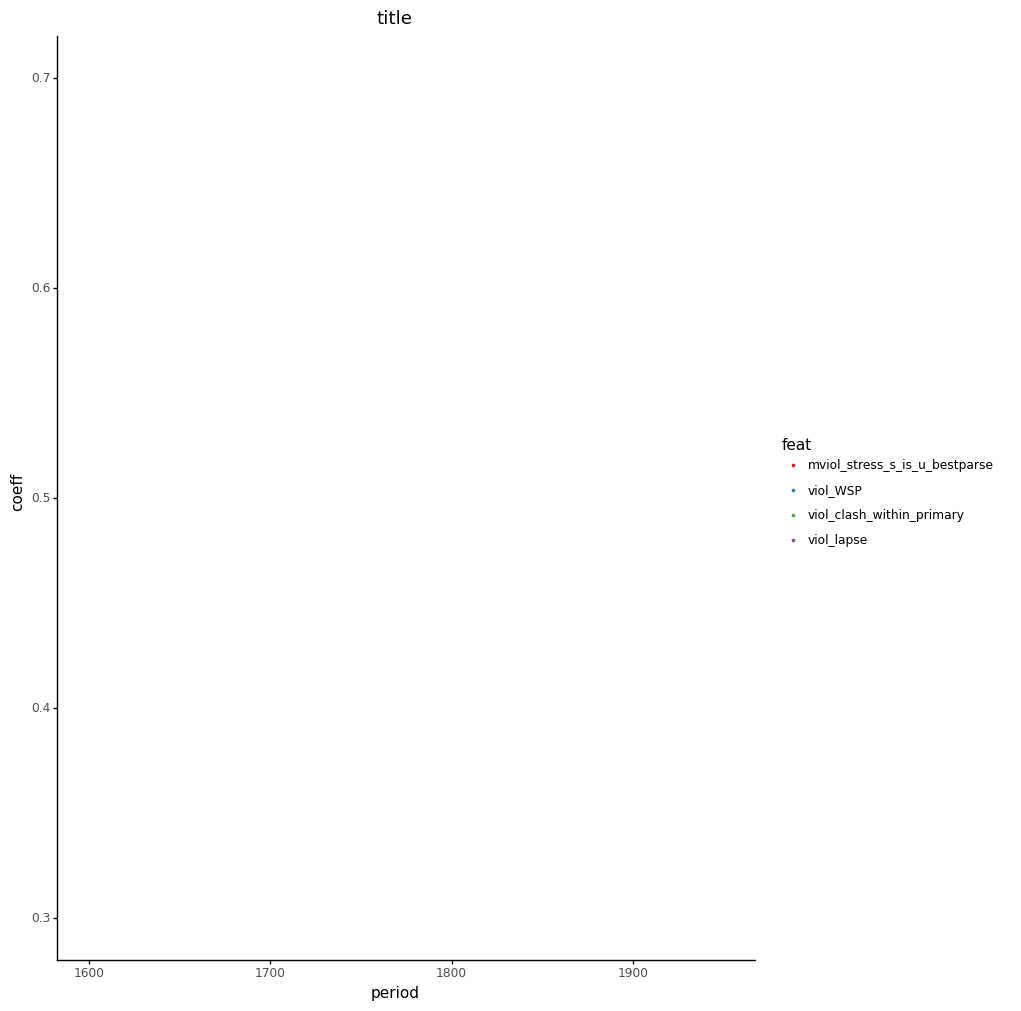

<ggplot: (8738784625267)>

In [27]:
p9.options.figure_size=(9,12)
fig=p9.ggplot(p9.aes(x='period',y='coeff', color='feat'), data=figdf_dfc)
fig+=p9.geom_point(size=.5)
# fig+=p9.geom_smooth(span=.5)
fig+=p9.theme_classic()
fig+=p9.scale_color_brewer(type='qual', palette=6)
# fig+=p9.facet_wrap('metagenre')
# fig+=p9.facet_grid('num_monosylls~coeff')
fig+=p9.labs(title='title')
fig+=p9.ylim(.3,.7)
fig